In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [9]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height = 180


In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [8]:
data_cat = data_train.class_names

In [58]:
data_cat


['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [11]:
data_val =tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                      image_size=(img_height,img_width),
                                                      batch_size=32,
                                                      shuffle=False,
                                                      validation_split=False)

Found 351 files belonging to 36 classes.


In [12]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


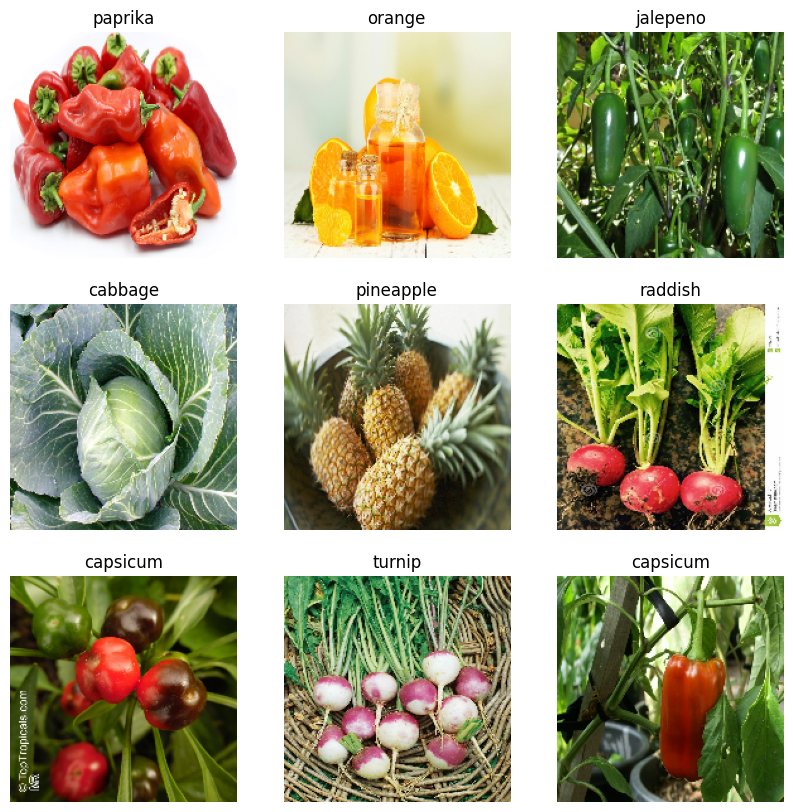

In [15]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')


In [17]:
from tensorflow.keras.models import Sequential

In [18]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [34]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense( len(data_cat))
    
])

In [35]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 54s 483ms/step - accuracy: 0.0629 - loss: 3.8557 - val_accuracy: 0.4160 - val_loss: 2.2628
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 426ms/step - accuracy: 0.2791 - loss: 2.4731 - val_accuracy: 0.5641 - val_loss: 1.5463
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 419ms/step - accuracy: 0.4343 - loss: 1.9702 - val_accuracy: 0.7436 - val_loss: 1.0720
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 450ms/step - accuracy: 0.5745 - loss: 1.4420 - val_accuracy: 0.8348 - val_loss: 0.6488
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 44s 440ms/step - accuracy: 0.7168 - loss: 0.9687 - val_accuracy: 0.8718 - val_loss: 0.5262
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 46s 463ms/step - accuracy: 0.8112 - loss: 0.6215 - val_accuracy: 0.9031 - val_loss: 0.4806
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 453ms/step - accuracy: 0.8909 - loss: 0.4034 - val_accuracy: 0.9088 - val_loss: 0.5934
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 455ms/step - accuracy: 0.9272 - loss: 0.2844 - val_accu

Text(0.5, 1.0, 'Loss')

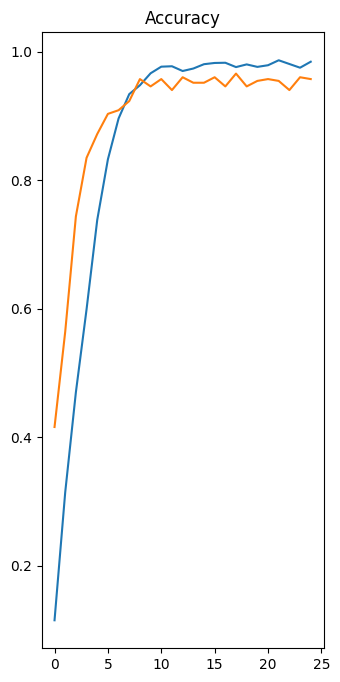

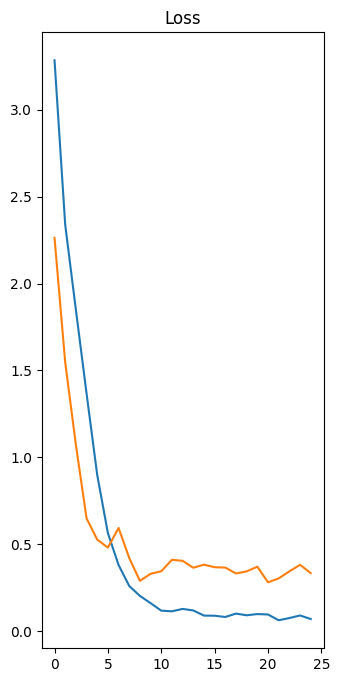

In [41]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [53]:
image = 'onion.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [54]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [55]:
score = tf.nn.softmax(predict)

In [56]:
print('Veg/Frurit in image is {} with accuarcy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Frurit in image is beetroot with accuarcy of 99.66


In [57]:
model.save('Image_classify.keras')